In [3]:
from __future__ import division, absolute_import, print_function
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import os
os.chdir(r"D:\data\ortoCC\design-with-alignments\4heptade-7")
print(os.getcwd())

#score the fasta (takes about 10 min)
#!{CCO}/fastscore.exe full4heptad.fasta --out-name=full4heptad_B07 --align=-7,0,7 --orientation=B

name = '4h-1or2N-not_first'

#cutoff line:
al = "B07"
delta = 1
dir_name = name+"-DEL1.00"
input_fasta = 'full4heptad.fasta'
input_score_file = 'full4heptad_B07.bin'
#Filtering
ids = get_ids_from_fasta(input_fasta)
fasta = u.load_fasta(input_fasta)

filtered_ids = [i for i in ids if (r.one_or_two_N(fasta[i], 'f') and not r.N_in_fist_heptad(fasta[i], 'f'))]
print(len(filtered_ids))


filtered_fasta = name+'.fasta'
filter_fasta(fasta, filtered_ids, filtered_fasta)
score_file = name+'_'+al+'.bin'
print(score_file)
filter_bin_score_file(input_score_file, input_fasta, filtered_ids, score_file)

D:\data\ortoCC\design-with-alignments\4heptade-7
1536
4h-1or2N-not_first_B07.bin


In [4]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2
import os

import hepran
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import numpy as np
CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
from glob import glob
import pandas as pd
from StringIO import StringIO

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk',  font_scale=1.5)
sns.set_style('whitegrid')

In [4]:
c_list = []
print(dir_name)
for bc in np.linspace(-9,-7.5, 31):
    nc = bc + delta
    cutoff = u.Cutoff(binding=bc, nonbinding=nc)
    c_list.append(cutoff)
            
print(len(c_list))
c_list;

4h-1or2N-not_first-DEL1.00
31


In [5]:
%%time
for cutoff in c_list:
    print(cutoff)
    a_dir, set_files = get_sets(dir_name+"/"+name, binding_cutoff=cutoff.binding, nonbinding_cutoff=cutoff.nonbinding,
                                 alignment=al,
                                 fasta=filtered_fasta, score_file=score_file,
                                 solver_exe=CCO+"/solver.exe", fake=False, verbose=False, skip_existing=False,
                                 timeout_s=1600)
    for set_file in set_files:
        print(set_file)
        analyse_set_file(set_file, filtered_fasta, alignment="B07",
                         scorer_exe=CCO+"/fastscore.exe", verbose=False, skip_drawing=True)
        

Cutoff(binding=-9.0, nonbinding=-8.0)
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-9.00_nc-8.00/all.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-9.00_nc-8.00/homo.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-9.00_nc-8.00/hetero.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-9.00_nc-8.00/hetero-ex.00.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-9.00_nc-8.00/hetero-ex.00.01.set
Cutoff(binding=-8.9499999999999993, nonbinding=-7.9499999999999993)
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.95_nc-7.95/all.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.95_nc-7.95/homo.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.95_nc-7.95/hetero.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.95_nc-7.95/hetero-ex.00.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.95_nc-7.95/hetero-ex.00.01.set
Cutoff(binding=-8.9000000000000004, nonbinding=-7.9000000000000004)
4h-1or2N-not

In [5]:
set_infos = glob(dir_name+"/*/*.set_info")
df = load_set_infos_to_dataframe(set_infos)

In [6]:
mp = get_max_pairs_by_type(df)
mp.sort_values(by="binding_cutoff", inplace=True)
mp.reset_index(inplace=True)
mp

,dirname,type,max_N_pairs,binding_cutoff,nonbinding_cutoff,count_all_sets,set_names,count_max_sets
0,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,homo,3,-9.00,-8.00,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
1,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,all,3,-9.00,-8.00,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
2,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,hetero-ex,3,-9.00,-8.00,2,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,2
3,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,hetero,2,-9.00,-8.00,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
4,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,homo,3,-8.95,-7.95,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
5,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,hetero-ex,4,-8.95,-7.95,2,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,2
6,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,hetero,3,-8.95,-7.95,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
7,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,all,5,-8.95,-7.95,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
8,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,homo,5,-8.90,-7.90,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1
9,4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_...,hetero-ex,5,-8.90,-7.90,1,4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_...,1


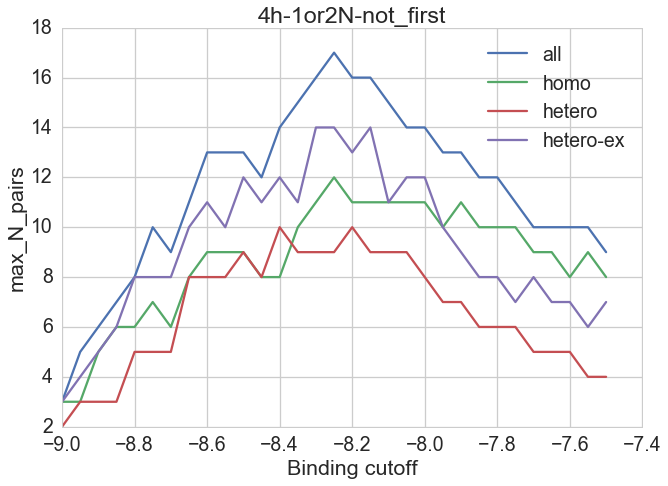

In [7]:
#%matplotlib notebook

plt.figure()
for pair_type in ["all", "homo", "hetero", "hetero-ex"]:
    df_type = mp[mp.type == pair_type]
    plt.plot(df_type.binding_cutoff, df_type.max_N_pairs, label=pair_type)
    
plt.title(name)   
plt.legend()
plt.ylabel("max_N_pairs")
plt.xlabel("Binding cutoff")

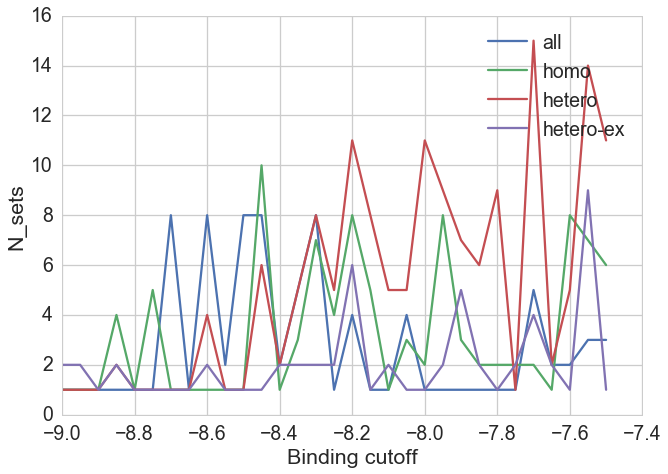

In [9]:
plt.figure()
for pair_type in ["all", "homo", "hetero", "hetero-ex"]:
    df_type = mp[mp.type == pair_type]
    plt.plot(df_type.binding_cutoff, df_type.count_max_sets, label=pair_type)

plt.legend()
plt.ylabel("N_sets")
plt.xlabel("Binding cutoff")
#plt.ylim([0, 15])

In [10]:
#analyse set files
df_to_plot = df[-8>=df.binding_cutoff]
set_files = list(df_to_plot["!full_name"])

dirs = [os.path.dirname(sf) for sf in set_files]
dirs = list(set(dirs))

all_set_files = []
for d in dirs:
    sf = glob(d+"/*.set")
    all_set_files += sf
all_set_files

['4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\all.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero-ex.02.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero-ex.04.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero.01.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero.02.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero.03.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\hetero.04.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\\homo.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.90_nc-7.90\\all.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.90_nc-7.90\\hetero-ex.00.00.set',
 '4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-

In [11]:
%%time
comp = analyse_sets(all_set_files, filtered_fasta, alignment="B07", scorer_exe=CCO+"/fastscore.exe", 
                      username="ajasja", password="agrftAGADIR", serial=False)
for r in comp:
    print(r)

4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\all.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero-ex.02.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero-ex.04.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero.01.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero.02.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero.03.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\hetero.04.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.10_nc-7.10\homo.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.90_nc-7.90\all.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.90_nc-7.90\hetero-ex.00.00.set
4h-1or2N-not_first-DEL1.00/4h-1or2N-not_first_B07_bc-8.90_nc-7.90\hetero.00.set
4h-1or2N-not_first-DEL1.00/4h-

In [12]:
sns.set_context('talk',  font_scale=1)
sns.set_style('white')

dirs = glob(dir_name+"/*")
dir_name

'4h-1or2N-not_first-DEL1.00'

In [13]:
for d in dirs:
    draw_overlap_matrix(d, close=True);    
    draw_overlap_matrix(d, kind="peptides",close=True);

4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.50_nc-6.50/pairs_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.50_nc-6.50/pairs_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.50_nc-6.50/peptides_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.50_nc-6.50/peptides_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.55_nc-6.55/pairs_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.55_nc-6.55/pairs_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.55_nc-6.55/peptides_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.55_nc-6.55/peptides_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.60_nc-6.60/pairs_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.60_nc-6.60/pairs_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.60_nc-6.60/peptides_overlap.png
4h-1or2N-not_first-DEL1.00\4h-1or2N-not_first_B07_bc-7.60_nc-

In [14]:
u.load_set_file(all_set_files[-1])

[['P79', 'P79'],
 ['P604', 'P604'],
 ['P738', 'P738'],
 ['P743', 'P743'],
 ['P804', 'P804'],
 ['P823', 'P823'],
 ['P925', 'P925'],
 ['P2167', 'P2167'],
 ['P2170', 'P2170'],
 ['P2253', 'P2253'],
 ['P2447', 'P2447'],
 ['P2482', 'P2482']]

In [15]:
mat = get_overlaps_num_matrix(set_files)

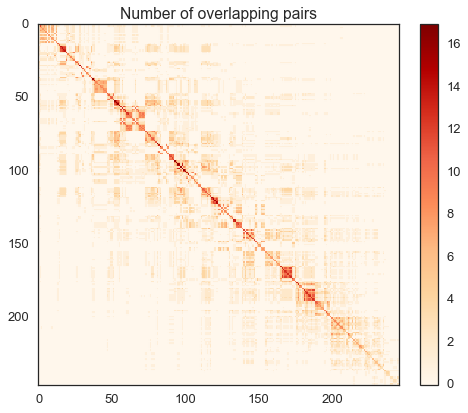

In [16]:
plot_matrix_mpl(mat, close=False, cmap="OrRd");
#plt.xlim([0, 150])
#plt.ylim([0, 150])
plt.title("Number of overlapping pairs")